<a href="https://colab.research.google.com/github/dhsingh0815/ML/blob/main/Bayes/TermFreqInverseDocFrequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Ecommerce_data.csv')
df.head(5)

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


# Convert to lower case
# REmove stopping words and punctuation

In [ ]:
sentences=[
    'python is a great programming language',
    'I love learning programming in python',
    'data science and python programming are related'
]

In [ ]:
df['label'].value_counts()

,count
label,
Household,6000
Electronics,6000
Clothing & Accessories,6000
Books,6000


In [ ]:
label ={'Household' :0 , 'Electronics':1, 'Clothing & Accessories':2, 'Books':3}
df['label_encode']=df['label'].map(label)
df.head(5)

,Text,label,label_encode
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfdif_matrix= vectorizer.fit_transform(sentences)
tfidf_array=tfdif_matrix.toarray()
tfidf_array
# 3 sentences X 13 unique keywords matrix
# Each word becomes feature columns
#X = vectorizer.fit_transform(df['Text'])
#y = df['label_encode']
# Term Frequency , Inverse document Frequency

array([[0.        , 0.        , 0.        , 0.52004008, 0.        ,
        0.52004008, 0.52004008, 0.        , 0.        , 0.30714405,
        0.30714405, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.52004008,
        0.        , 0.        , 0.52004008, 0.52004008, 0.30714405,
        0.30714405, 0.        , 0.        ],
       [0.4189401 , 0.4189401 , 0.4189401 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.24743277,
        0.24743277, 0.4189401 , 0.4189401 ]])

In [ ]:
features=vectorizer.get_feature_names_out()

In [ ]:
for i, sentences in enumerate(sentences):
  print(f'{i+1} : {sentences}')
  print('TF-IDF scores')
  for word, score in zip(features, tfidf_array[i]):
    print(f'{word} : {score}')
  print()

1 : python is a great programming language
TF-IDF scores
and : 0.0
are : 0.0
data : 0.0
great : 0.5200400832078022
in : 0.0
is : 0.5200400832078022
language : 0.5200400832078022
learning : 0.0
love : 0.0
programming : 0.3071440505460478
python : 0.3071440505460478
related : 0.0
science : 0.0

2 : I love learning programming in python
TF-IDF scores
and : 0.0
are : 0.0
data : 0.0
great : 0.0
in : 0.5200400832078022
is : 0.0
language : 0.0
learning : 0.5200400832078022
love : 0.5200400832078022
programming : 0.3071440505460478
python : 0.3071440505460478
related : 0.0
science : 0.0

3 : data science and python programming are related
TF-IDF scores
and : 0.4189401020758947
are : 0.4189401020758947
data : 0.4189401020758947
great : 0.0
in : 0.0
is : 0.0
language : 0.0
learning : 0.0
love : 0.0
programming : 0.24743277305481848
python : 0.24743277305481848
related : 0.4189401020758947
science : 0.4189401020758947



In [ ]:
import string
df['Text']=df['Text'].map(lambda sentence: sentence.lower().translate(str.maketrans('', '', string.punctuation)))
df.head(5)

,Text,label,label_encode
0,urban ladder eisner low back studyoffice compu...,Household,0
1,contrast living wooden decorative boxpainted b...,Household,0
2,io crest sypci40010 pci raid host controller c...,Electronics,1
3,isakaa baby socks from just born to 8 years pa...,Clothing & Accessories,2
4,indira designer womens art mysore silk saree w...,Clothing & Accessories,2


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words=nltk.corpus.stopwords.words('english')


In [ ]:
#[ var for var in iterable if condition: statement]
def prepocessing(sentence):
  words=sentence.split()
  filtered_tokens=[word for word in words if word not in stop_words]
  return ' '.join(filtered_tokens)

In [ ]:
df['Filtered_tokens']=df['Text'].map(prepocessing)
df.head(5)

,Text,label,label_encode,Filtered_tokens
0,urban ladder eisner low back studyoffice compu...,Household,0,urban ladder eisner low back studyoffice compu...
1,contrast living wooden decorative boxpainted b...,Household,0,contrast living wooden decorative boxpainted b...
2,io crest sypci40010 pci raid host controller c...,Electronics,1,io crest sypci40010 pci raid host controller c...
3,isakaa baby socks from just born to 8 years pa...,Clothing & Accessories,2,isakaa baby socks born 8 years pack 4 6 8 12 i...
4,indira designer womens art mysore silk saree w...,Clothing & Accessories,2,indira designer womens art mysore silk saree b...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

,count
label_encode,
0,6000
1,6000
2,6000
3,6000


In [ ]:
X=df['Filtered_tokens']
y =df['label_encode']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
y_test.value_counts()

,count
label_encode,
0,1213
2,1205
3,1197
1,1185


In [ ]:
vectorizer = TfidfVectorizer()
X_train_pre= vectorizer.fit_transform(X_train)
X_test_pre=vectorizer.transform(X_test)

multinomialNB=MultinomialNB()
multinomialNB.fit(X_train_pre, y_train)

y_pred = multinomialNB.predict(X_test_pre)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)



0.9597916666666667
[[1177   15   15    6]
 [  25 1151    0    9]
 [  25    4 1174    2]
 [  58   17   17 1105]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1213
           1       0.97      0.97      0.97      1185
           2       0.97      0.97      0.97      1205
           3       0.98      0.92      0.95      1197

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



Text(50.722222222222214, 0.5, 'Truth')

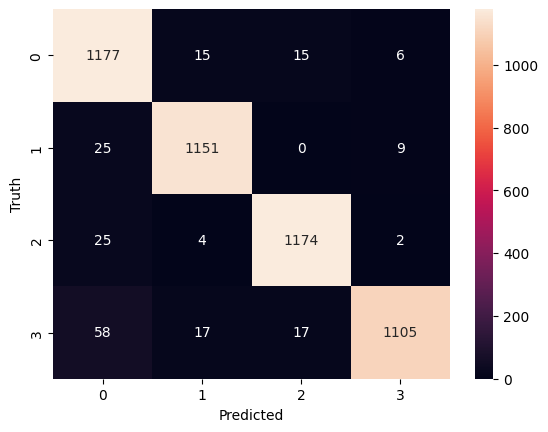

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
matrix=X_test_pre.toarray()
res=[row for row in matrix if any(row)]
print(res)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 

In [ ]:
# Pipeline to apply multiple process to some input
clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1234
           1       0.97      0.97      0.97      1202
           2       0.97      0.98      0.98      1184
           3       0.98      0.93      0.96      1180

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



Calculation of accuracy

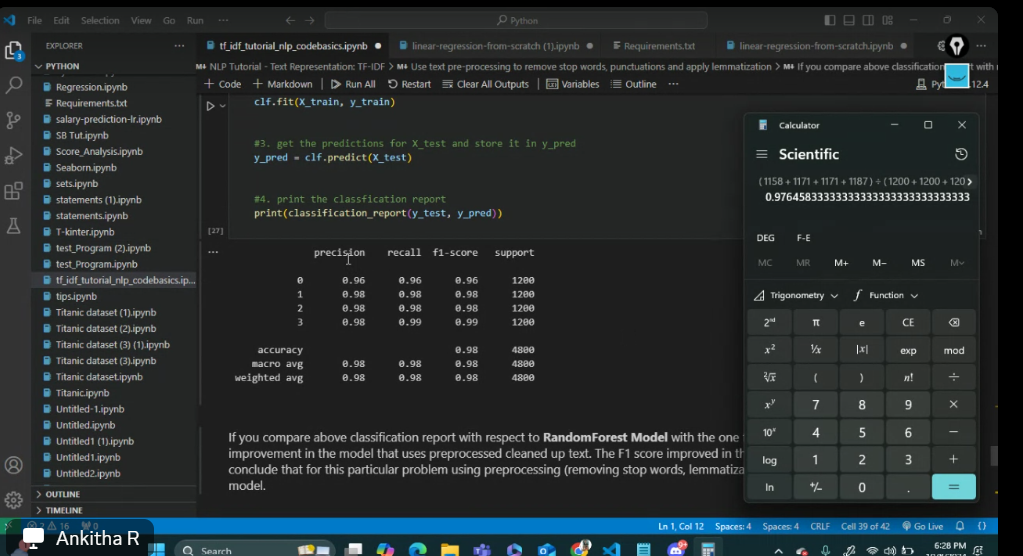

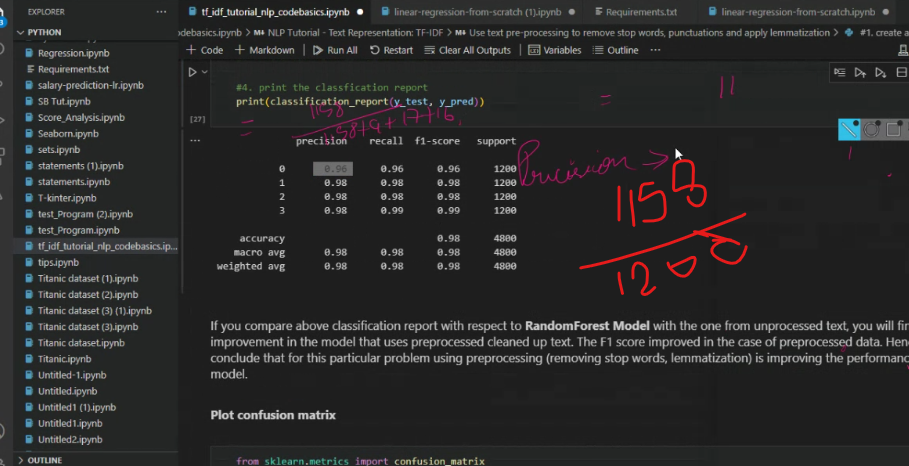

Recall

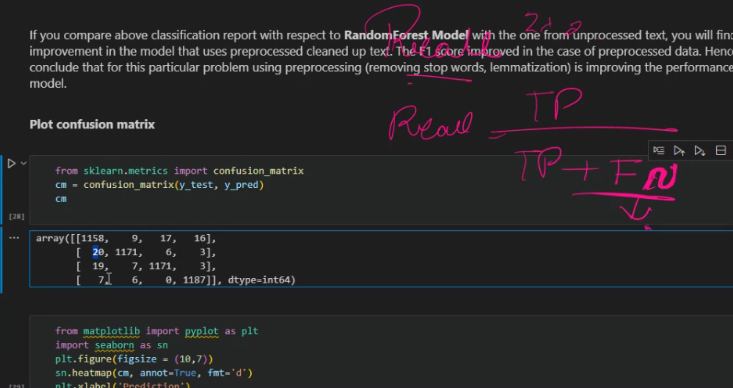

F1 score

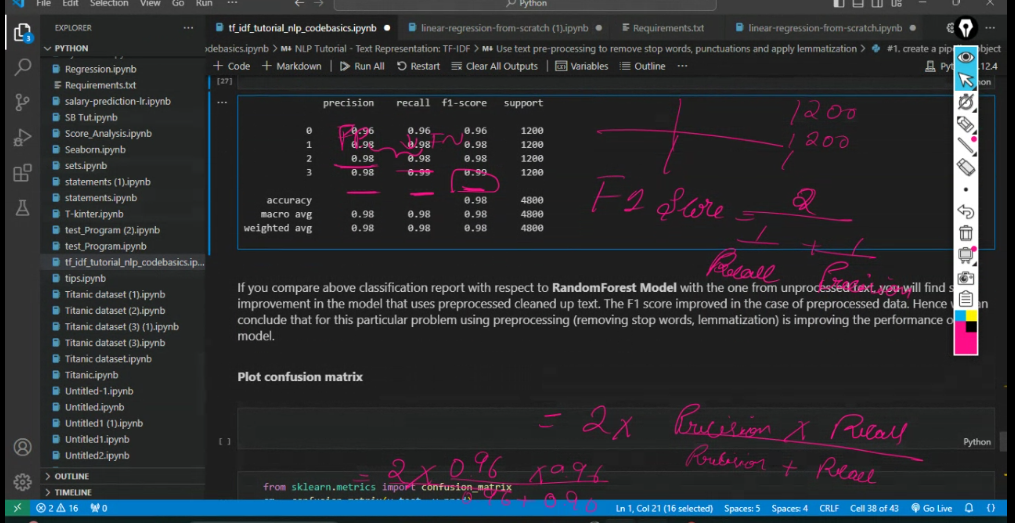